<a href="https://colab.research.google.com/github/diegooyarcet/headline-analysis/blob/main/headline_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Headline Analysis

## LA TERCERA
### Objetivo: Analizar el lenguaje utilizado en los titulares del diario La Tercera, específicamente aquellos que se encuentran en la sección "Lo Último", enfocándose en identificar patrones, temas frecuentes y características lingüísticas.

### Herramientas:
* Python
* NLTK
* BeautifulSoup (bs4)
* requests
* matplotlib
* re
* pandas

### Obtención del conjunto de datos

In [1]:
!pip install requests beautifulsoup4 pandas

In [2]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'https://www.latercera.com/lo-ultimo'

In [4]:
df = pd.DataFrame(columns=['tag', 'headline'])

In [5]:
try:
  response = requests.get(url)
except Exception as exc:
  print(f"Error: {exc}")

In [6]:
if response.status_code == 200:
  print("Solicitud exitosa")
  html_content = response.text
else:
  print(f"Error en la solicitud. Código de estado: {response.status_code}")

Solicitud exitosa


In [7]:
lo_ultimo = BeautifulSoup(html_content, 'html.parser')
paginator = lo_ultimo.find('div', class_='pagination')
nav_paginator = paginator.find('nav')
ul_paginator = nav_paginator.find('ul')
pagination_info = ul_paginator.find('li', class_='pagination-info')
text_pagination_info = pagination_info.get_text(strip=True)
match = re.search(r"de\s+(\d+)", text_pagination_info)

if match:
  total_paginas = int(match.group(1))
  print(f"Número total de páginas: {total_paginas}")
else:
  print("No se encontró el patrón de número de páginas en el texto.")

Número total de páginas: 667


In [8]:
df = df[0:0]

In [9]:
# total_paginas = 2
for pagina in range(1, total_paginas + 1):
  print(f"PÁGINA {pagina}")
  url_pagina = f"{url}/page/{pagina}"
  response = requests.get(url_pagina)

  if response.status_code == 200:
    html_lo_ultimo = response.text
    soup_lo_ultimo = BeautifulSoup(html_lo_ultimo, 'html.parser')

    if soup_lo_ultimo:
      section_lo_ultimo = soup_lo_ultimo.find('section', class_='top-mainy')

      if section_lo_ultimo:
        div_headlines = section_lo_ultimo.find_all('div', class_='headline | width_full hl')

        if len(div_headlines) > 0:
          for headline in div_headlines:
            tag = ''
            titular = ''
            h3_headline = headline.find('h3')

            if h3_headline:
              anchor_headline = h3_headline.find('a')

              if anchor_headline:
                tag_element = anchor_headline.find('span', class_='tag')

                if tag_element:
                  tag = tag_element.get_text(strip=True)
                else:
                  tag = ''
                  print("No hay tag")

                titular = anchor_headline.get_text(strip=True)

                if titular:
                  titular = titular.replace(tag, '', 1).strip()
                else:
                  titular = ''
                  print("No hay titular")

                df.loc[len(df)] = [tag, titular]
              else:
                print("No se encontró el h3")
            else:
              print("No se encontró el anchor")
        else:
          print(f"No se encontraron titulares en la página {pagina}")
      else:
        print(f"No se encontró el section de títulares de la página {pagina}")
    else:
      print(f"No se encontro el soup de la página {pagina}")
  else:
    print(f"No se pudo acceder a la página: {url_pagina}")

print(df)

PÁGINA 1
PÁGINA 2
PÁGINA 3
PÁGINA 4
PÁGINA 5
PÁGINA 6
PÁGINA 7
PÁGINA 8
PÁGINA 9
PÁGINA 10
PÁGINA 11
PÁGINA 12
PÁGINA 13
PÁGINA 14
PÁGINA 15
PÁGINA 16
PÁGINA 17
PÁGINA 18
PÁGINA 19
PÁGINA 20
PÁGINA 21
PÁGINA 22
PÁGINA 23
PÁGINA 24
PÁGINA 25
PÁGINA 26
PÁGINA 27
PÁGINA 28
PÁGINA 29
PÁGINA 30
PÁGINA 31
PÁGINA 32
PÁGINA 33
PÁGINA 34
PÁGINA 35
PÁGINA 36
PÁGINA 37
PÁGINA 38
PÁGINA 39
PÁGINA 40
PÁGINA 41
PÁGINA 42
PÁGINA 43
PÁGINA 44
PÁGINA 45
PÁGINA 46
PÁGINA 47
PÁGINA 48
PÁGINA 49
PÁGINA 50
PÁGINA 51
PÁGINA 52
PÁGINA 53
PÁGINA 54
PÁGINA 55
PÁGINA 56
PÁGINA 57
PÁGINA 58
PÁGINA 59
PÁGINA 60
PÁGINA 61
PÁGINA 62
PÁGINA 63
PÁGINA 64
PÁGINA 65
PÁGINA 66
PÁGINA 67
PÁGINA 68
PÁGINA 69
PÁGINA 70
PÁGINA 71
PÁGINA 72
PÁGINA 73
PÁGINA 74
PÁGINA 75
PÁGINA 76
PÁGINA 77
PÁGINA 78
PÁGINA 79
PÁGINA 80
PÁGINA 81
PÁGINA 82
PÁGINA 83
PÁGINA 84
PÁGINA 85
PÁGINA 86
PÁGINA 87
PÁGINA 88
PÁGINA 89
PÁGINA 90
PÁGINA 91
PÁGINA 92
PÁGINA 93
PÁGINA 94
PÁGINA 95
PÁGINA 96
PÁGINA 97
PÁGINA 98
PÁGINA 99
PÁGINA 100
PÁGINA 1

### Procesamiento de texto

Limpieza y estructuración de datos textuales para ser analizados.

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [21]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

In [19]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  tokens = word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

  return tokens

In [22]:
df['tokens'] = df['headline'].apply(preprocess_text)
print(df[['headline', 'tokens']].head())

                                            headline  \
0  Temblor se registra en zona centro norte de Chile   
1  Gobierno pide aprobar la reforma previsional p...   
2  Subsidio eléctrico: Once académicos y expertos...   
3  Senado despacha a ley proyecto que paga deuda ...   
4  Para evitar delitos: aprueban proyecto que obl...   

                                              tokens  
0    [temblor, registra, zona, centro, norte, chile]  
1  [gobierno, pide, aprobar, reforma, previsional...  
2  [subsidio, eléctrico, once, académicos, expert...  
3  [senado, despacha, ley, proyecto, paga, deuda,...  
4  [evitar, delitos, aprueban, proyecto, obliga, ...  


Análisis de frecuencia de palabras

In [23]:
from collections import Counter

In [28]:
all_tokens = [word for tokens in df['tokens'] for word in tokens]
word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(20)

print(f"Palabras más comunes en los {len(df['headline'])} titulares leídos: {most_common_words}")

Palabras más comunes en los 9990 titulares leídos: [('suscriptor', 2482), ('tras', 718), ('chile', 571), ('columna', 547), ('colo', 460), ('gobierno', 330), ('reforma', 313), ('nuevo', 289), ('boric', 281), ('2025', 278), ('años', 270), ('caso', 266), ('cómo', 252), ('presidente', 248), ('trump', 235), ('dónde', 221), ('año', 220), ('nueva', 210), ('pensiones', 197), ('ver', 189)]


Visualización de palabras más comunes

In [25]:
import matplotlib.pyplot as plt

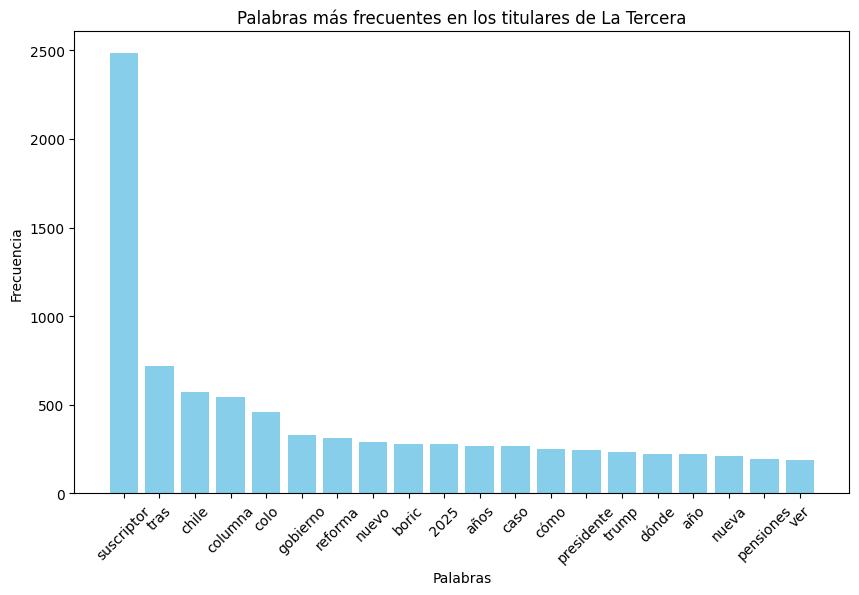

In [29]:
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.title('Palabras más frecuentes en los titulares de La Tercera')
plt.xticks(rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

Análisis de sentimientos

In [30]:
from textblob import TextBlob
from textblob.exceptions import NotTranslated

In [31]:
def sentiment_analysis(text):
  try:
    blob = TextBlob(text)
    return blob.sentiment.polarity
  except NotTranslated:
    return None

In [32]:
df['sentiment'] = df['headline'].apply(sentiment_analysis)

avg_sentiment = df['sentiment'].mean()
print(f"Sentimiento promedio: {avg_sentiment}")

Sentimiento promedio: 0.0025636553761553766
